In [2]:
import numpy as np
import qp
import scipy.stats as ss
import matplotlib.pyplot as plt
import individual_metrics as inmet
%matplotlib inline

In [3]:
truefunc = ss.norm(loc=5.0,scale=0.5)
x = np.arange(0.0,10.0,0.02)
truex = truefunc.pdf(x)

In [4]:
truegrid=np.zeros([10000,len(truex)])
for i in range(10000):
    truegrid[i,:] = truex

In [5]:
true_pdf = qp.Ensemble(truegrid.shape[0],gridded=(x,truegrid))

made the pool of 4 in 0.047590970993
made the catalog in 26.5348279476


In [6]:
truesample = np.array(truefunc.rvs(size=10000))

In [7]:
testtrue = inmet.EvaluateMetric(true_pdf,truesample)

In [8]:
trueks,truepval = testtrue.KS(using='gridded',dx=0.0001)
print trueks
print truepval

0.0106122035982
0.208576483095


In [26]:
truecvm,truecvmpval = testtrue.CvM(using='gridded',dx=0.0001)
print truecvm
print truecvmpval

0.182805879964
0.303414538589


In [27]:
truead, trueadpval = testtrue.AD(using='gridded',dx=0.0001,vmin=-2.,vmax=11.)
print truead
print trueadpval

0.926574798897
0.398203401808


In [12]:
centerpoints = np.array([-1.,0.0,1.,2.,3.,4.,4.5,4.7,4.9,4.95,5.0,5.05,5.10,5.3,5.5,6.,7.,8.,9.,10.,11.])
numpoints= len(centerpoints)
ksvals = np.zeros(numpoints)
kspvals = np.zeros(numpoints)
cvmvals = np.zeros(numpoints)
cvmpvals = np.zeros(numpoints)
advals = np.zeros(numpoints)
adpvals = np.zeros(numpoints)
vminx = -2.
vmaxx = 11.

In [13]:
for i,cent in enumerate(centerpoints):
    print "doing centerpoint %f"%(cent)
    xdist= ss.norm(loc=cent,scale=0.5)
    xsample = np.array(xdist.rvs(size=10000))
    testx = inmet.EvaluateMetric(true_pdf,xsample)
    ksvals[i],kspvals[i] = testx.KS(using='gridded',dx=0.0001)
    print ksvals[i]
    print kspvals[i]
    cvmvals[i],cvmpvals[i] = testx.CvM(using='gridded',dx=0.0001)
    print cvmvals[i]
    print cvmpvals[i]
    advals[i],adpvals[i] = testx.AD(using='gridded',dx=0.0001,vmin=vminx,vmax=vmaxx)
    print advals[i]
    print adpvals[i]


doing centerpoint -1.000000
1.0
0.0
3333.33333333
0.375298909236
inf
0.0
doing centerpoint 0.000000


/Users/sam/anaconda/lib/python2.7/site-packages/skgof/ecdfgof.py:81: RuntimeWarning: divide by zero encountered in log
  return -samples - (factors * log(data * (1 - data[::-1]))).sum() / samples


0.999999995552
0.0
3333.33333332
0.375298909235
inf
0.0
doing centerpoint 1.000000
0.999992899245
0.0
3333.33328621
0.375298907359
inf
0.0
doing centerpoint 2.000000
0.997710788298
0.508438688757
3333.15649024
0.37529186749
167842.022491
5.99999999684e-08
doing centerpoint 3.000000
0.953012707308
0.488756559204
3290.07956106
0.373564140313
74086.3539523
5.99999999684e-08
doing centerpoint 4.000000
0.684341050873
0.334988261545
2232.06889949
0.321057605126
18997.3567462
5.99999999684e-08
doing centerpoint 4.500000
0.38749252051
0.0885691521236
806.039674915
0.180888237538
4777.33623643
5.99999999684e-08
doing centerpoint 4.700000
0.244282444551
0.00688290613845
322.181495378
0.0734497344952
1754.27635569
5.99999999684e-08
doing centerpoint 4.900000
0.0811959408212
8.51904718158e-58
34.5603640296
3.34737104208e-05
180.005998173
5.99999999684e-08
doing centerpoint 4.950000
0.0431421202821
1.30512101225e-16
9.41008392323
8.45989944764e-14
48.9194306779
5.99999999684e-08
doing centerpoint 5

In [14]:
dists = centerpoints - 5.0
print dists

[-6.   -5.   -4.   -3.   -2.   -1.   -0.5  -0.3  -0.1  -0.05  0.    0.05
  0.1   0.3   0.5   1.    2.    3.    4.    5.    6.  ]


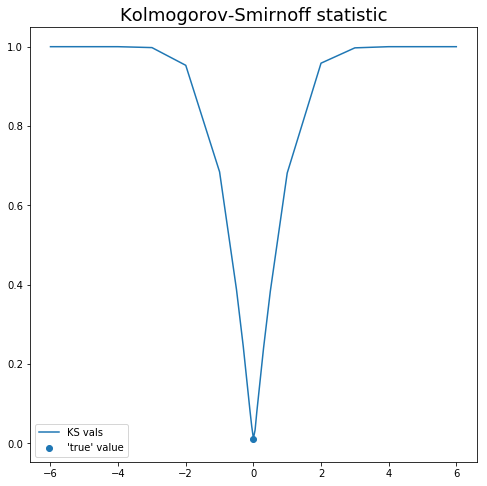

In [43]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,ksvals,label="KS vals")
plt.scatter([0.0],[trueks],label = "'true' value")
plt.legend()
plt.title("Kolmogorov-Smirnoff statistic",fontsize=18)

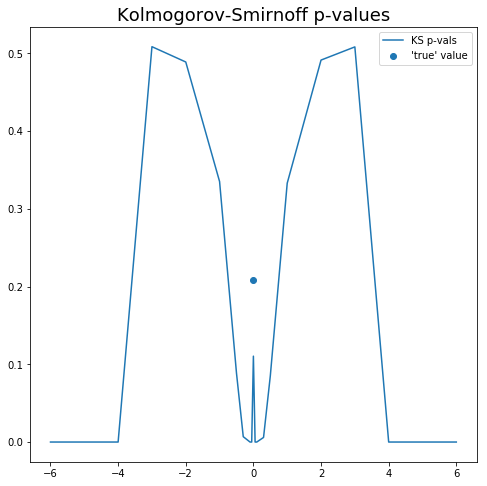

In [44]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,kspvals,label="KS p-vals")
plt.scatter([0.0],[truepval],label = "'true' value")
plt.legend()
plt.title("Kolmogorov-Smirnoff p-values",fontsize=18)

In [21]:
print ksvals
print kspvals

[ 1.          1.          0.9999929   0.99771079  0.95301271  0.68434105
  0.38749252  0.24428244  0.08119594  0.04314212  0.01201721  0.03342846
  0.07831741  0.2398141   0.38316067  0.68141627  0.95844091  0.99705842
  0.9999958   1.          1.        ]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   5.08438689e-01
   4.88756559e-01   3.34988262e-01   8.85691521e-02   6.88290614e-03
   8.51904718e-58   1.30512101e-16   1.10435180e-01   3.82823729e-10
   8.52572236e-54   5.90734283e-03   8.50228420e-02   3.32917606e-01
   4.91221848e-01   5.08161288e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00]


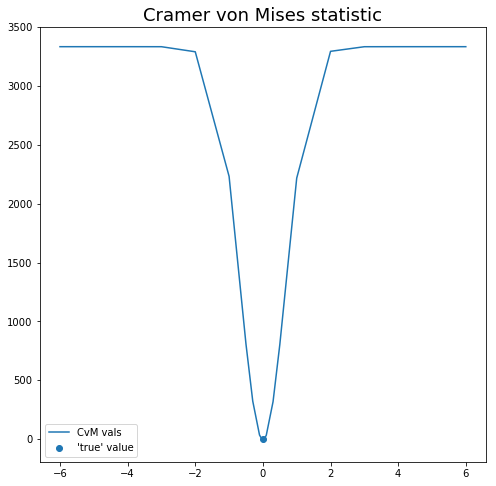

In [41]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,cvmvals,label="CvM vals")
plt.scatter([0.0],[truecvm],label = "'true' value")
plt.legend()
plt.title("Cramer von Mises statistic",fontsize=18)

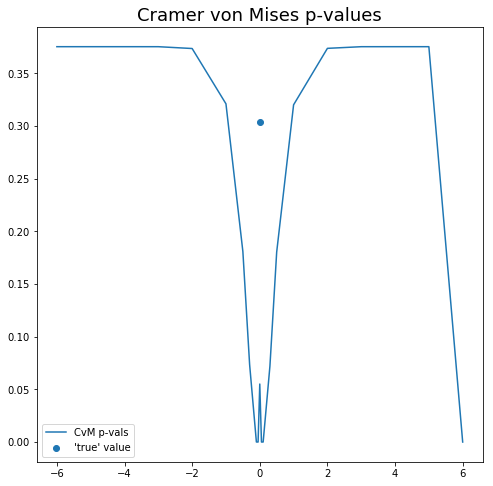

In [42]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,cvmpvals,label="CvM p-vals")
plt.scatter([0.0],[truecvmpval],label = "'true' value")
plt.legend()
plt.title("Cramer von Mises p-values",fontsize=18)

In [22]:
print cvmvals
print cvmpvals

[  3.33333333e+03   3.33333333e+03   3.33333329e+03   3.33315649e+03
   3.29007956e+03   2.23206890e+03   8.06039675e+02   3.22181495e+02
   3.45603640e+01   9.41008392e+00   4.45140993e-01   6.34569541e+00
   3.24869678e+01   3.17449886e+02   8.02597983e+02   2.21705256e+03
   3.29390931e+03   3.33306289e+03   3.33333331e+03   3.33333333e+03
   3.33333333e+03]
[  3.75298909e-01   3.75298909e-01   3.75298907e-01   3.75291867e-01
   3.73564140e-01   3.21057605e-01   1.80888238e-01   7.34497345e-02
   3.34737104e-05   8.45989945e-14   5.50567194e-02   4.77395901e-15
   2.04993241e-05   7.20445178e-02   1.80320010e-01   3.20130062e-01
   3.73718755e-01   3.75288140e-01   3.75298908e-01   3.75298909e-01
   0.00000000e+00]


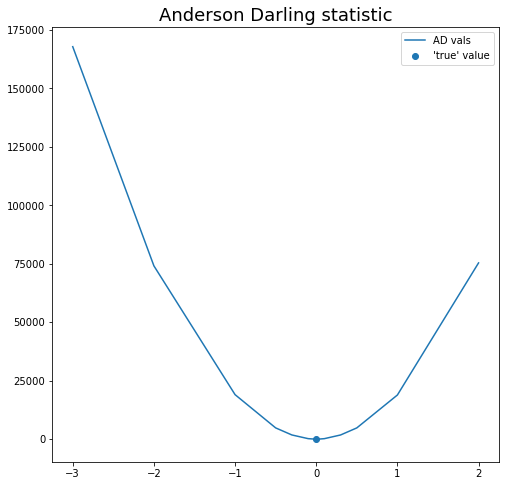

In [45]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,advals,label="AD vals")
plt.scatter([0.0],[truead],label = "'true' value")
plt.legend()
plt.title("Anderson Darling statistic", fontsize=18)

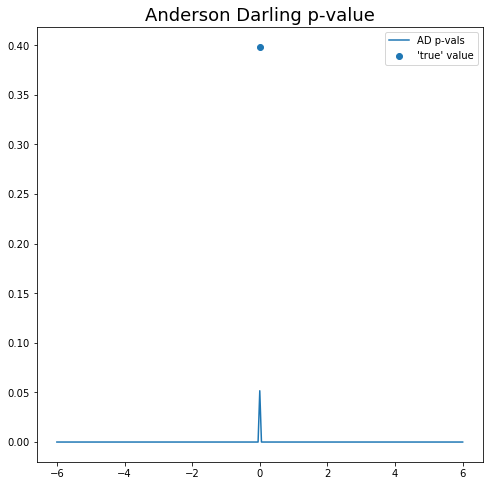

In [46]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,adpvals,label="AD p-vals")
plt.scatter([0.0],[trueadpval],label = "'true' value")
plt.legend()
plt.title("Anderson Darling p-value", fontsize=18)

In [23]:
print advals
print adpvals

[             inf              inf              inf   1.67842022e+05
   7.40863540e+04   1.89973567e+04   4.77733624e+03   1.75427636e+03
   1.80005998e+02   4.89194307e+01   2.46452238e+00   3.50831290e+01
   1.71467307e+02   1.74884158e+03   4.77289222e+03   1.88429538e+04
   7.53523741e+04              inf              inf              inf
              inf]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   6.00000000e-08
   6.00000000e-08   6.00000000e-08   6.00000000e-08   6.00000000e-08
   6.00000000e-08   6.00000000e-08   5.17064059e-02   6.00000000e-08
   6.00000000e-08   6.00000000e-08   6.00000000e-08   6.00000000e-08
   6.00000000e-08   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00]
